In [98]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from local_utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [113]:
# WS_file = '/Users/brian/Documents/research/Active Projects/Measuring_Wind_with_Ingenuity/code/WE__0133___________DER_WS__________________P01.xml'
which_sol = "0091"
path = '/Users/brian/Documents/research/Active Projects/Measuring_Wind_with_Ingenuity/code/MEDA_WS_Data/'
WS_file = path + 'WE__%s___________DER_WS__________________P02.xml' % (which_sol)

time, wind = retrieve_time_wind(WS_file, start_time=datetime(1900, 1, 1, 9, 10, 0), 
                                end_time=datetime(1900, 1, 1, 10, 0, 0))

Processing label: /Users/brian/Documents/research/Active Projects/Measuring_Wind_with_Ingenuity/code/MEDA_WS_Data/WE__0091___________DER_WS__________________P02.xml
Now processing a Header structure: HEADER
Now processing a Table_Delimited structure: TABLE


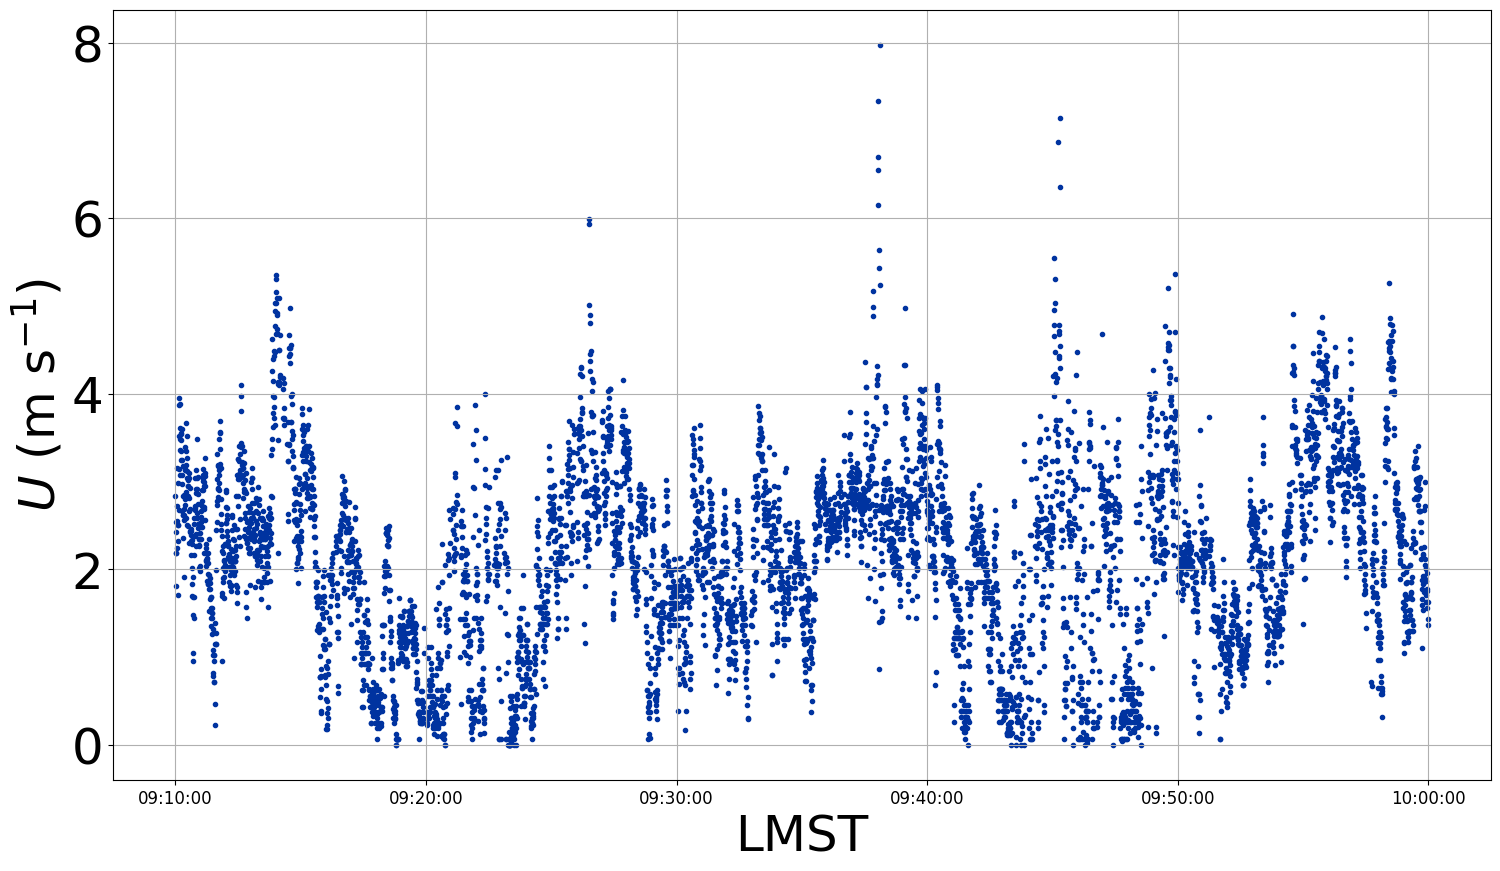

In [114]:
fig = plt.figure(figsize=(10*aspect_ratio, 10))
ax = fig.add_subplot(111)

ax.scatter(time, wind, marker='.', color=BoiseState_blue)

xfmt = md.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
ax.grid(True)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=36)
ax.set_xlabel("LMST", fontsize=36)
ax.set_ylabel(r'$U\ \left( {\rm m\ s^{-1}} \right)$', fontsize=36)
# ax.set_xlim([start_time, end_time])

wind *= 100. # Convert to cm/s

19.678324879309315 0.1877905929799308


(-25566.61805521991, -25566.616897812502)

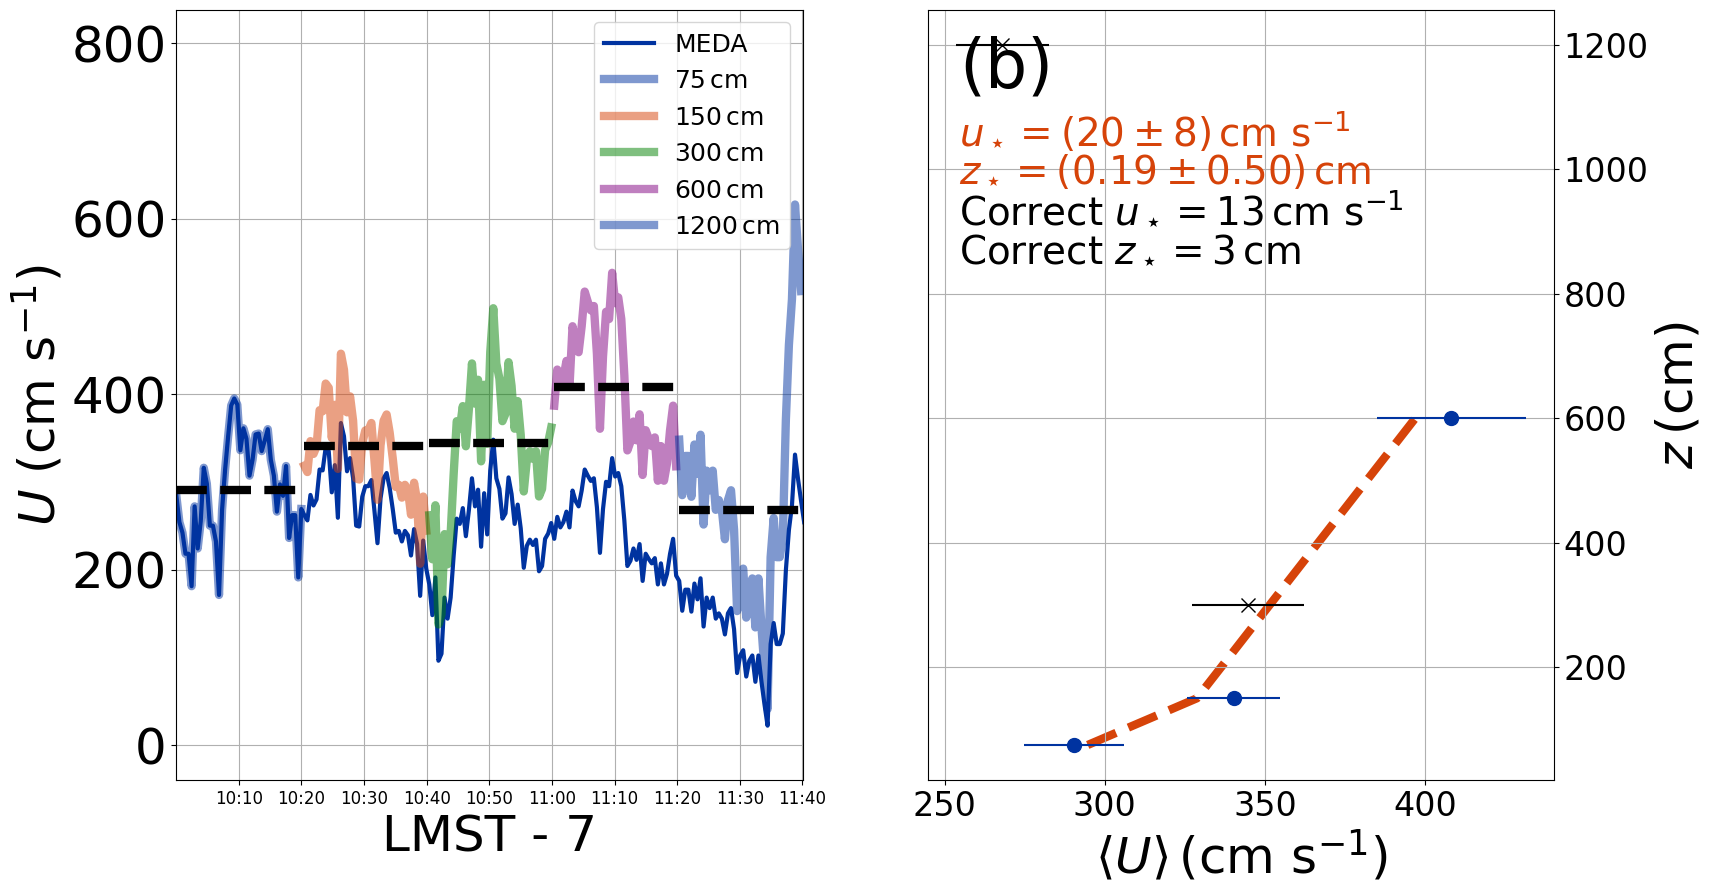

In [119]:
fig = plt.figure(figsize=(10*aspect_ratio, 10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

saved_zstar = 3. # cm
saved_ustar = kappa*men/np.log(zs[0]/saved_zstar)
t0 = np.min(time)

scaled_windspeeds = create_synthetic_wind_profile(wind, zs, saved_zstar, z0=np.min(zs))
t0 = np.min(time)
averaged_windspeeds, std_windspeeds = sample_wind_profile(sample_time, t0, time, scaled_windspeeds, zs)
ax1 = make_plot_of_original_and_scaled_windspeeds(time, wind, zs, sample_time, t0, scaled_windspeeds, 
                                                  averaged_windspeeds, ax1)

### Fit synthetic wind profile ###

# Take the three points with the smallest scatter
# srt_ind = np.argsort(std_windspeeds)
# cur_zs = zs[srt_ind[:3]]
# cur_averaged_windspeeds = averaged_windspeeds[srt_ind[:3]]
# cur_std_windspeeds = std_windspeeds[srt_ind[:3]]
# srt_ind = np.argsort(cur_zs)
# cur_zs = cur_zs[srt_ind]
# cur_averaged_windspeeds = cur_averaged_windspeeds[srt_ind]
# cur_std_windspeeds = cur_std_windspeeds[srt_ind]

# inlier_zs, inlier_averaged_windspeeds, inlier_std_windspeeds,\
#     outlier_zs, outlier_averaged_windspeeds, outlier_std_windspeeds,\
#     popt, unc, pcov = fit_wind_profile_and_drop_outliers(cur_zs, cur_averaged_windspeeds, cur_std_windspeeds,
#                                                          drop_outliers=False, num_sigma=5., rescale_unc=False,
#                                                          consider_scaled_uncertainties=False)

inlier_zs, inlier_averaged_windspeeds, inlier_std_windspeeds,\
    outlier_zs, outlier_averaged_windspeeds, outlier_std_windspeeds,\
    popt, unc, pcov = fit_wind_profile_and_drop_outliers(zs, averaged_windspeeds, std_windspeeds,
                                                         drop_outliers=True, num_sigma=5., rescale_unc=True,
                                                         consider_scaled_uncertainties=True)

ustar, zstar, sigma_ustar, sigma_zstar = collect_fit_values_and_unc(popt, unc, pcov)
print(ustar, zstar)
ax2 = make_plot_of_wind_data_and_profile(inlier_zs, inlier_averaged_windspeeds, inlier_std_windspeeds,
                                         outlier_zs, outlier_averaged_windspeeds, outlier_std_windspeeds, 
                                         popt, unc, pcov, ax2)

ax2.text(0.05, 0.725, r'Correct $u_\star = %.0f\, {\rm cm\ s^{-1}}$' % (saved_ustar), 
         fontsize=28, transform=ax2.transAxes)
ax2.text(0.05, 0.675, r'Correct $z_\star = %.0f\, {\rm cm}$' % (saved_zstar), 
         fontsize=28, transform=ax2.transAxes)

ax1.set_xlim([np.min(time), np.min(time) + timedelta(seconds=len(zs)*sampling_duration)])
# fig.savefig("Synthetic_Mars_Wind_Profile_Sol133.jpg", dpi=300, bbox_inches="tight")